Oppg1

1. Last inn data og utforsk
2. Legg rader for feature (independent variable) og target
(dependent variable) egne variabler
3. Del opp i treningsdata og testdata
4. Tren modellen
5. Predikér
6. Vurder hvor god modellen er

In [129]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

[[76.45974545]
 [70.67591138]
 [72.98944501]
 [78.77327908]
 [75.534332  ]
 [59.10824324]
 [66.04884412]
 [77.84786563]
 [77.61651226]
 [78.54192571]
 [74.37756518]
 [74.84027191]
 [62.11583696]
 [65.81749076]
 [67.66831766]
 [60.03365669]
 [79.00463244]
 [65.81749076]
 [71.1386181 ]
 [56.79470961]
 [57.95147642]
 [79.00463244]
 [55.17523607]
 [67.66831766]
 [78.07921899]
 [68.36237775]
 [65.5861374 ]
 [70.90726474]
 [71.60132483]
 [72.29538492]
 [80.62410598]
 [72.75809164]
 [67.89967103]
 [66.74290421]
 [63.27260377]
 [75.07162527]
 [76.22839209]
 [66.74290421]
 [70.90726474]
 [72.06403156]
 [65.5861374 ]
 [63.50395713]
 [56.56335625]
 [58.87688988]
 [65.81749076]
 [64.19801722]
 [73.91485846]
 [62.34719032]
 [70.44455802]
 [69.05643784]
 [69.98185129]
 [77.61651226]
 [72.52673828]
 [66.97425757]
 [68.82508448]
 [68.13102439]
 [68.82508448]
 [66.74290421]
 [79.2359858 ]
 [63.96666386]
 [71.1386181 ]
 [62.11583696]
 [84.09440642]
 [68.59373111]
 [70.67591138]
 [69.75049793]
 [67.89967

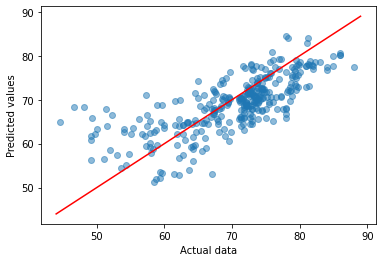

In [198]:
data = pd.read_csv('life-expectancy-data.csv')
df = pd.DataFrame(data)
new_df = df.dropna()
#df.head()
# X = np.array(new_df['Alcohol']).reshape(-1, 1)
# X = np.array(new_df['percentage expenditure']).reshape(-1, 1)
# X = np.array(new_df[' BMI ']).reshape(-1, 1)
# X = np.array(new_df['GDP']).reshape(-1, 1)
#X = np.array(new_df.filter(items=['Schooling', 'Alcohol', 'percentage expenditure', 'GDP'])).reshape(-1)

X = np.array(new_df['Schooling']).reshape(-1, 1)
y = np.array(new_df['Life expectancy ']).reshape(-1, 1)

# X_train - er predictors som brukes for trening
# X_test er predictors som vi tester modellen vår mot
# y_train (legg merke til liten y) outcomes vi vet er “rett”
# y_test er outcomes vi sammenlikner med for å kunne si hvor god modellen er
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

#Evaluate the performance of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = lr.intercept_

print("R2 score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Intercept: ", intercept)


plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual data")
plt.ylabel("Predicted values")
plt.show()

Oppgave 2

In [197]:
df_2 = pd.DataFrame(data)
df_3 = df_2.dropna()

countries = df_3['Country'].unique() #liste av alle landene
predictions = {}

#prediker levealder for hvert land
for country in countries:
    country_data = df_3[df_3['Country'] == country]
    
    X = np.array(country_data['Year']).reshape(-1, 1)
    y = np.array(country_data['Life expectancy ']).reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)
    X_test = np.array(2020).reshape(-1,1)
    predicted_life_expectancy = model.predict(X_test)[0]
    predictions[country] = predicted_life_expectancy

best_country = max(predictions, key=predictions.get)
print(predictions[best_country])
print(best_country)


[90.23095238]
Germany


Oppgave 3